In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import itertools
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc

In [4]:
# Provide column names as they are not specified in the file
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'label'
]

# Read the file with specified column names and specify that the age-information is not(!) the index
df = pd.read_csv("adult.data", header=None, names=column_names, index_col = False)

# Take a first look at the data
display(df.head(15))
print(df.shape)
display(df.info())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

In [5]:
# The summary doesn't show missing values (all Non-Null Counts are equal to the number of rows given in .shape. 
# But from .head() we can see there are entries featuring '?'. Let's encode them with NaN for further analysis.
df.replace(['?', ' ?', '? ', '  ?  '], np.nan, inplace=True)

# See if there are missing values now. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# now we see that in the columns 'workclass', 'occupation', 'native-country' there are missing values. 
# as we don't want to throw away approx. 2000 data points, we can replace the missing values with the most common value (mode) as all three are categorical data
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# lets check again for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
label             0
dtype: int64

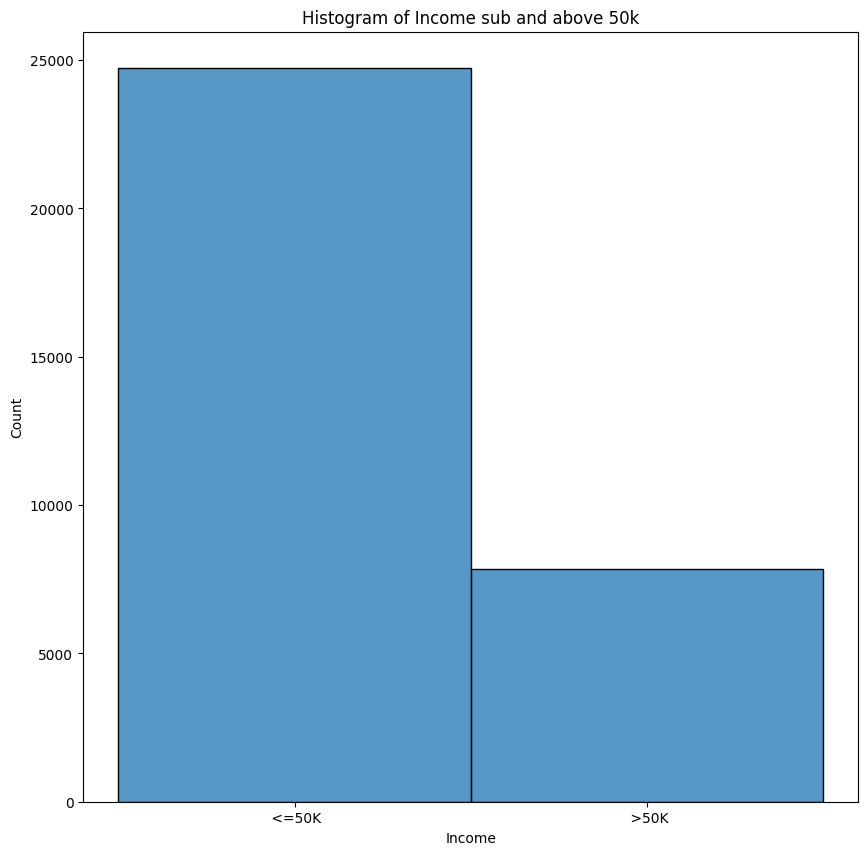

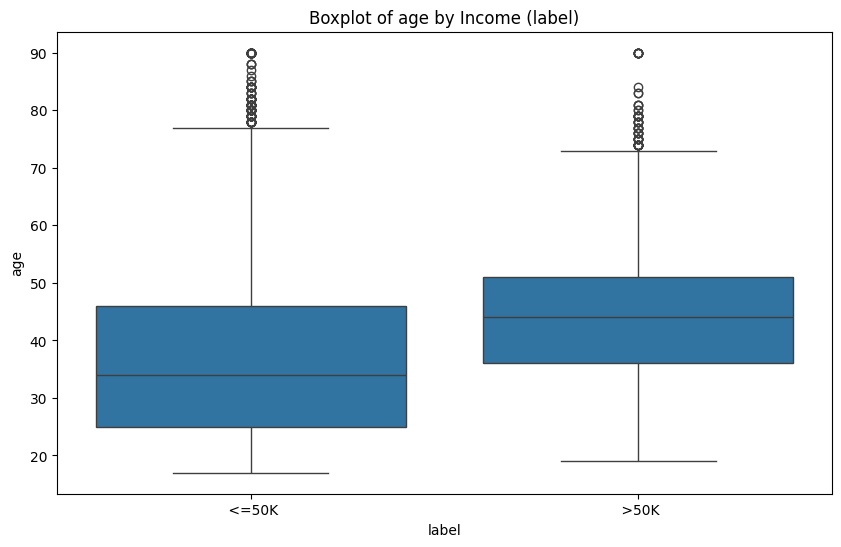

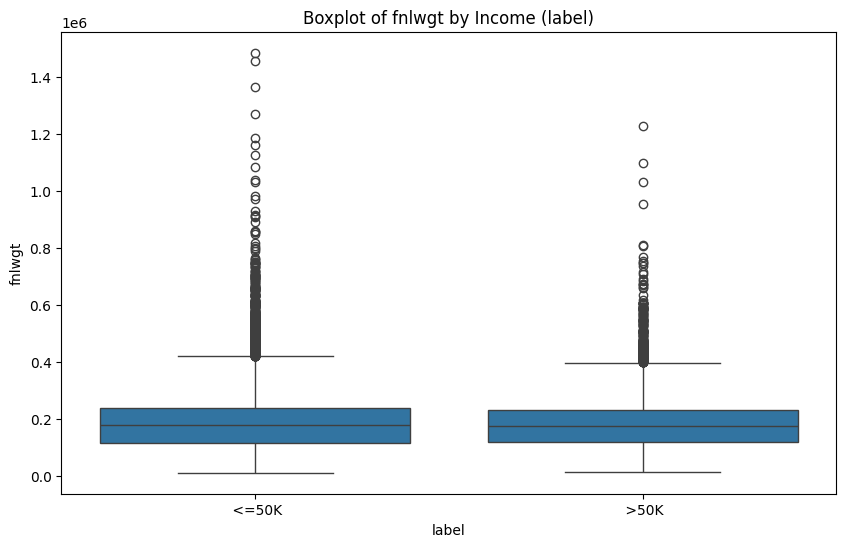

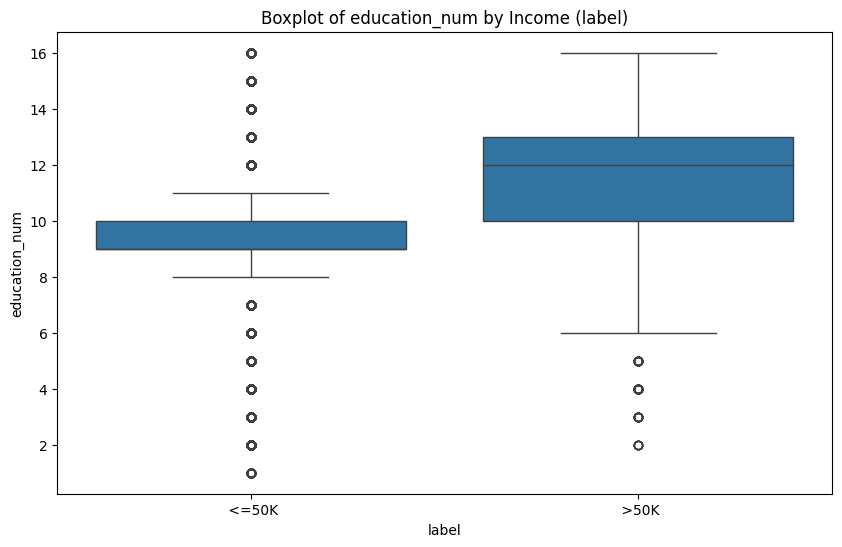

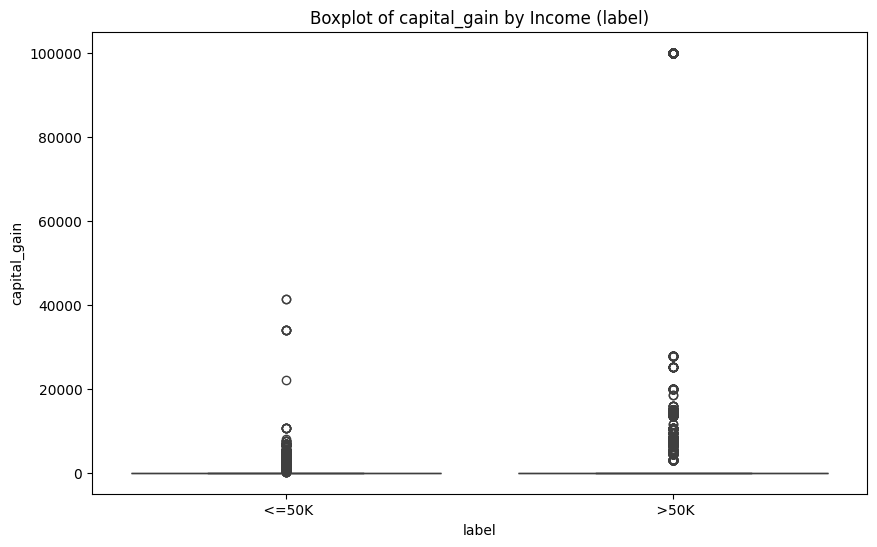

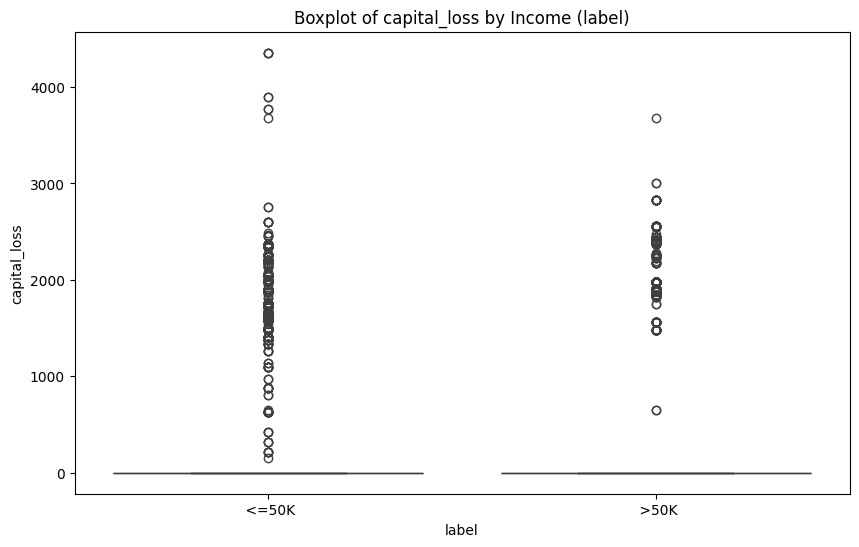

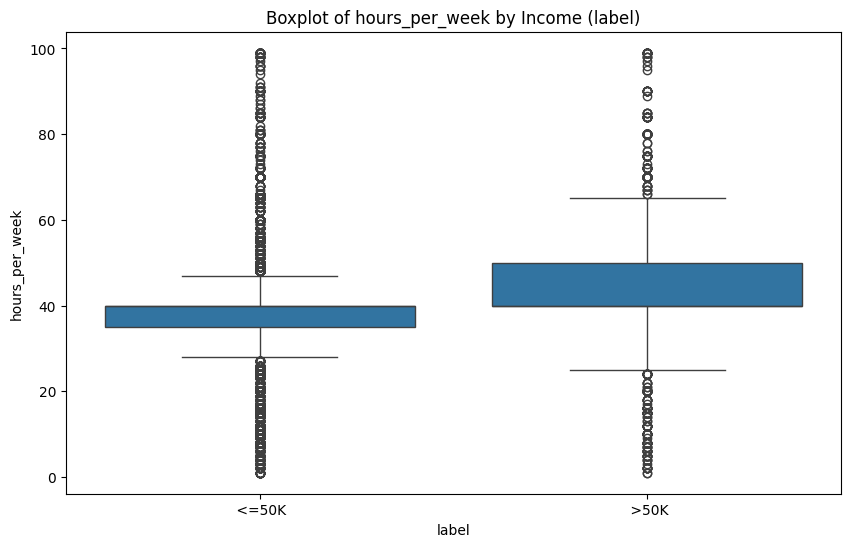

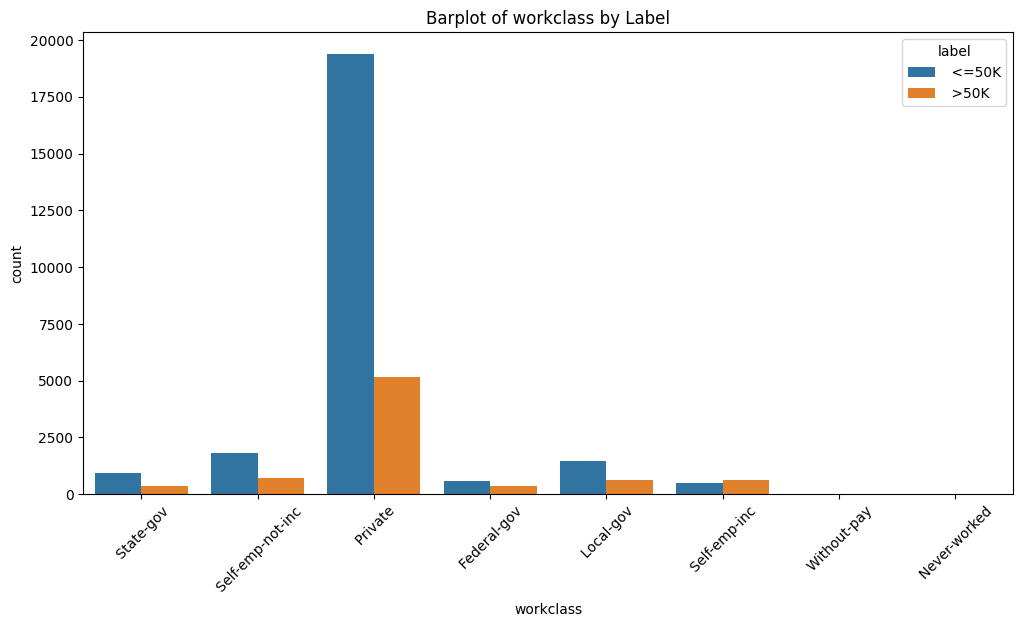

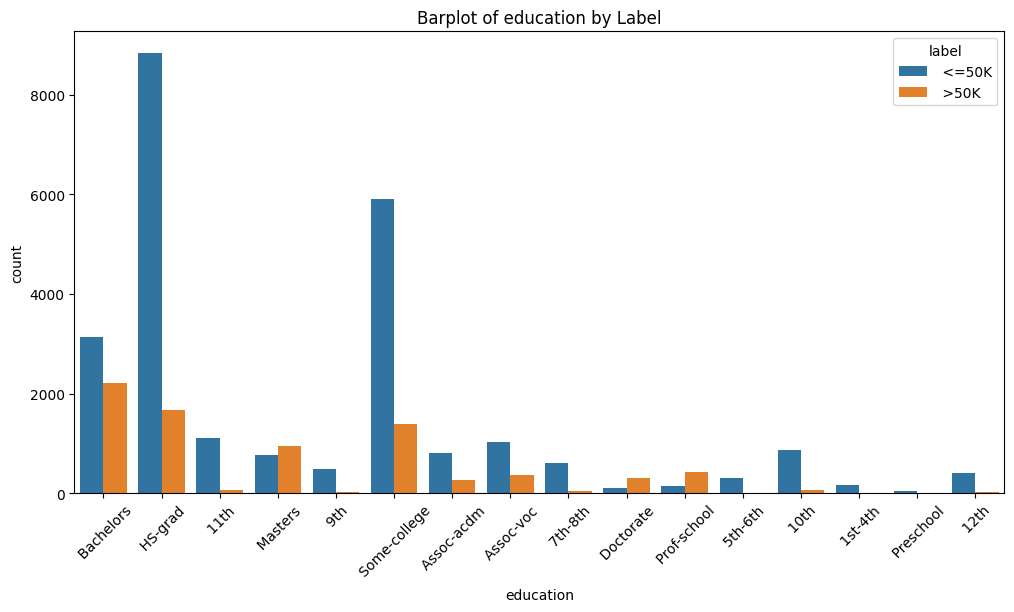

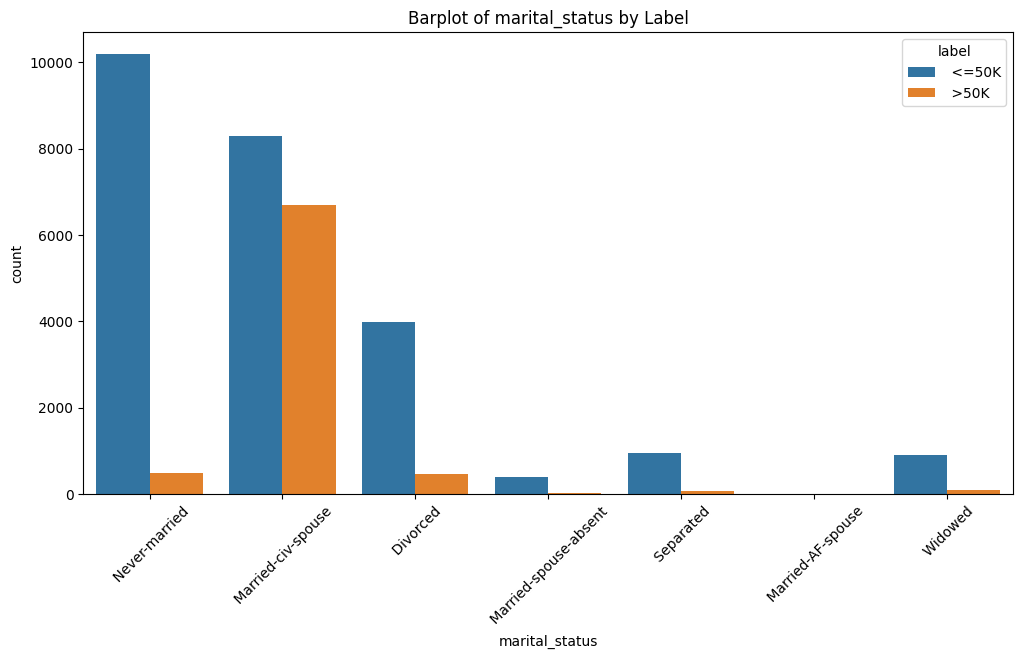

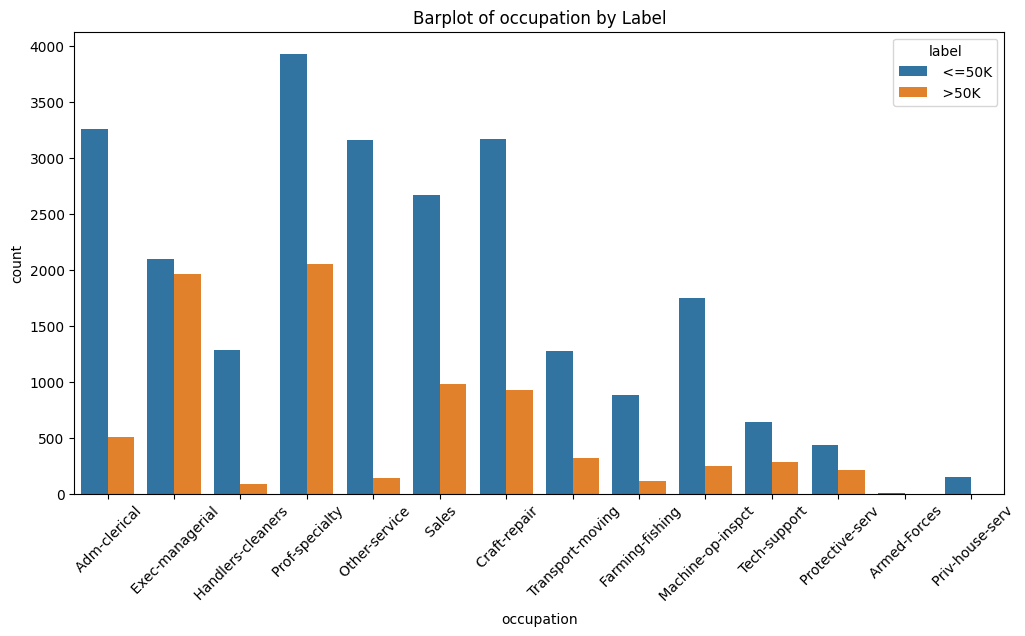

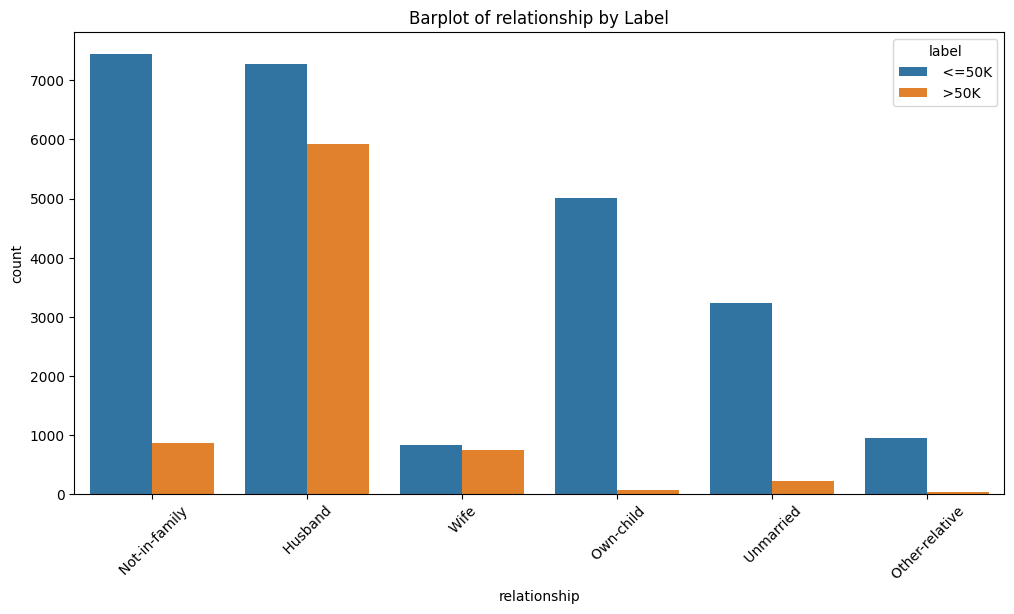

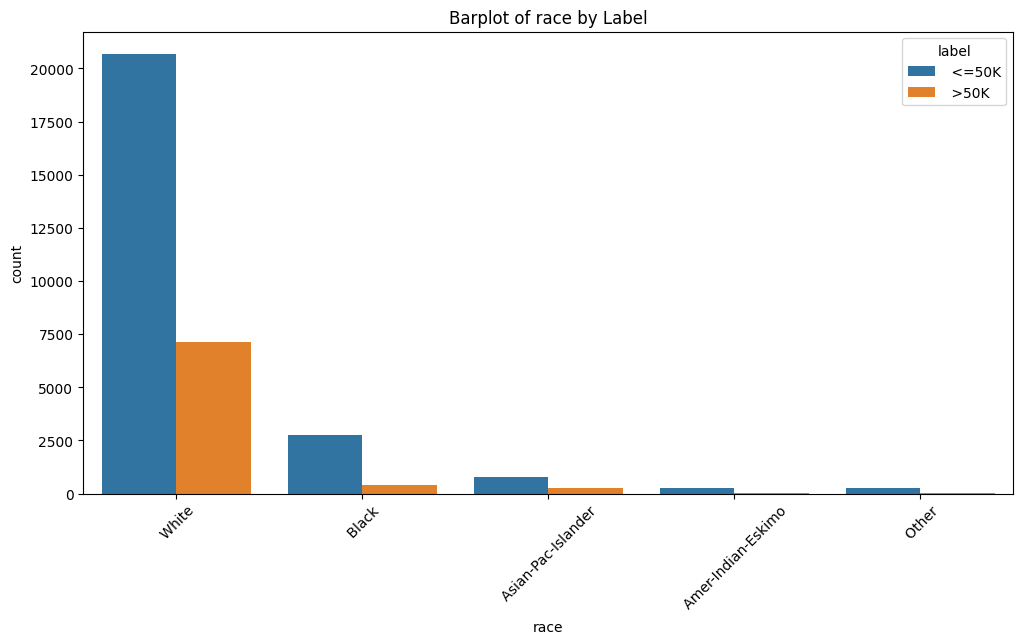

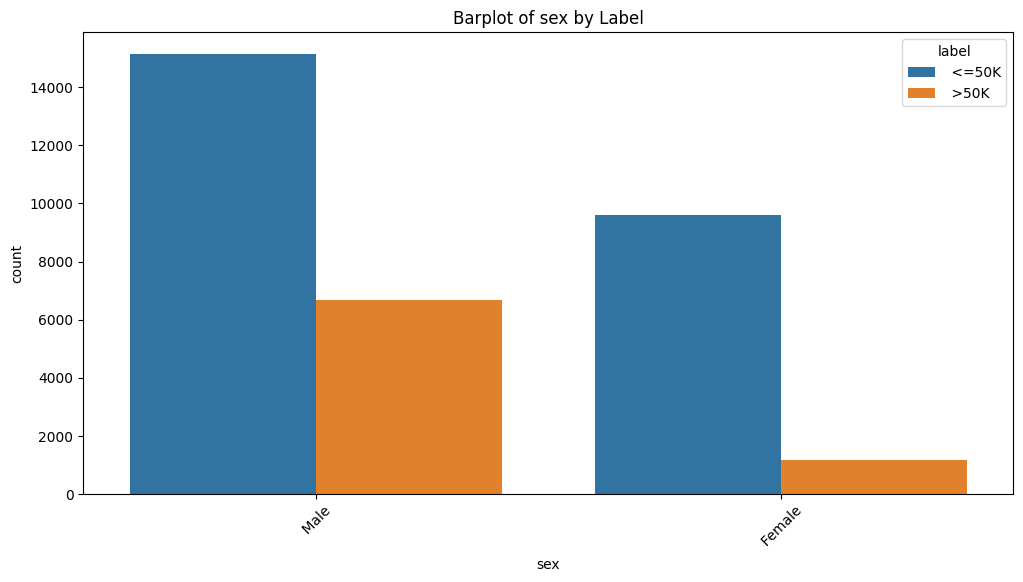

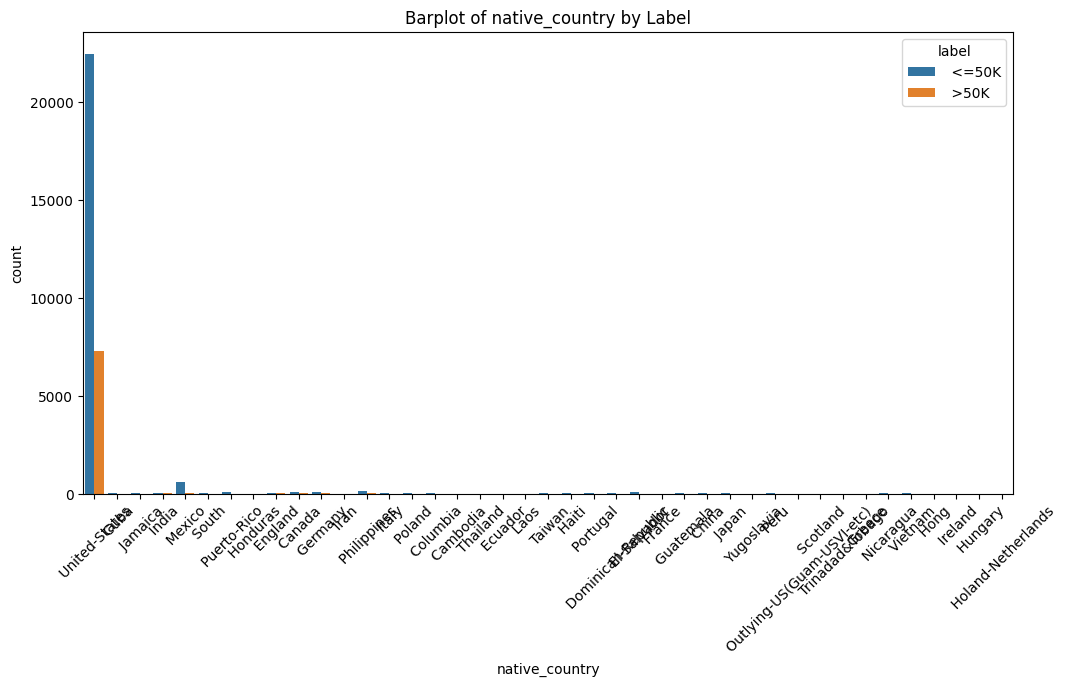

In [7]:
# after dealing with the problem of missing data, lets take again a look on the data. 
# we want to get a first glimpse on the relationsship of the features and the target value, as well as the distribution of the label

# show distribution of the label
plt.figure(figsize = (10,10))
sns.histplot(df['label'])
plt.title('Histogram of Income sub and above 50k')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Numerical features - Boxplots
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Income (label)')
    plt.show()

# Categorical features - Grouped Barplots
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'] 

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='label', data=df)
    plt.title(f'Barplot of {feature} by Label')
    plt.xticks(rotation=45)
    plt.show()

The histogram shows us that we have to deal with imbalanced data. An income of '<=50k' is way more present in the dataset than '>50k'.

In the displayed graphs, we observe patterns that suggest potential correlations between certain features and the label variable. These patterns could serve as valuable information for machine learning algorithms tasked with predicting the label. While not all features exhibit a straightforward or definitive tendency, the discernible correlations provide a foundation for building predictive models. The algorithms can leverage these relationships to make informed predictions about the label, even in cases where the associations are not universally clear or 100% conclusive.

In [8]:
#Preprocessing

# split the df in the data and target label
df_target = df['label']
df_data = df.drop(columns = 'label')

# Preprocess the label - Using LabelEncoder
label_encoder = LabelEncoder()
df_target = label_encoder.fit_transform(df_target)
label_names = ['<=50k', ' >50k']
label_order=[0,1]

# classify the data features (data-type)
numeric_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week', 'education_num']
# we leave out the feature education - reason will follow 
categorical_features = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

''' Education would be a features we want to encode ordinally as the differences make a real sense
(bigger difference between Preschool and Masters as between Bachelor and Masters).
But there is a feature called 'education-num' that may already do that. Lets investigate further.'''

# verify if there is only one specific 'education-num'-value for each unique value of education
unique_combinations_count = df.groupby(['education', 'education_num']).size().reset_index(name='Count')
print(unique_combinations_count)

''' As we can see in the table below, there is just one combination for each of the two values.
Also the numeration is in the correct order (least education (1 - Preschool) to most education
(16 - Doctorate). So we don't need to encode it manually and drop the 'education' column due to 
redundant data.'''

df_data = df_data.drop(columns = 'education')

# now we can create our train and test split
data_train, data_test, target_train, target_test = train_test_split(
    df_data, df_target, test_size=0.2, random_state=42, stratify=df_target)

# now we can define our pipeline 

# first define a columnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# now pipeline with ColumnTransformer, Balancer (RandomOverSampler), and estimator - just an example!
pipeline = Pipeline([
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler()), 
    ('estimator', None)
])

# now create Folds for Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        education  education_num  Count
0            10th              6    933
1            11th              7   1175
2            12th              8    433
3         1st-4th              2    168
4         5th-6th              3    333
5         7th-8th              4    646
6             9th              5    514
7      Assoc-acdm             12   1067
8       Assoc-voc             11   1382
9       Bachelors             13   5355
10      Doctorate             16    413
11        HS-grad              9  10501
12        Masters             14   1723
13      Preschool              1     51
14    Prof-school             15    576
15   Some-college             10   7291


In [22]:
# after preprocessing and prep, get a first impression on the performance of the classifiers

# as scorer we define accuracy
scoring_metric = 'accuracy'

# we want to test the models from the exercises with their basic parameters

# Create classifiers and save them in a list
knn_classifier = KNeighborsClassifier()
tree_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
classifier_to_test = [knn_classifier, tree_classifier, rf_classifier]
names = ['KNN', 'DecisionTree', 'Random Forest']


# iterate and test
for name, classifier in zip(names, classifier_to_test): 
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', RandomOverSampler()),
        ('estimator', classifier)
    ])   
    accuracy = cross_val_score(pipeline, data_test, target_test, cv=cv, scoring=scoring_metric)

    print(f'{name} Accuracy: {accuracy.mean()}')

KNN Accuracy: 0.7727629979361623
DecisionTree Accuracy: 0.8119174841913809
Random Forest Accuracy: 0.8486132707585311


The accuracy is a widely used metric in model evaluation, indicating the percentage of correctly classified instances. In this context, it is employed because the exact business case is unknown, and the goal is to maximize the overall classification accuracy.
It is important to note that metrics like recall and precision are oriented towards optimizing specific classes, which can be relevant if there are specific requirements for model performance. However, using accuracy in the case of imbalanced data poses the risk of favoring the majority class, especially when the class distribution is highly asymmetrical.
The fact that Random Forest exhibits the highest accuracy (84.97%), followed by the Decision Tree (81.87%) and KNN (78.15%), suggests that both Random Forest and Decision Tree are more effective in classifying the available data than the KNN algorithm. Accuracy measures the percentage of correctly classified instances, and the higher accuracy values for Random Forest and Decision Tree indicate that these algorithms better capture the overall data structure than KNN.
The differences in performance could be attributed to distinct algorithmic approaches. The KNN algorithm relies on local neighborhood information, while Decision Trees and Random Forest are grounded in decision rules and ensemble methods.

In [10]:
# after we got a first impression, lets do a randomized search for the three options (Hyperparameter-Tuning)

# define parameter grid 

knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Number of neighbors to consider
    'estimator__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'estimator__p': [1, 2],  # Power parameter for the Minkowski distance
}

dt_param_grid = {
    'estimator__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'estimator__splitter': ['best', 'random'],  # Strategy for choosing the split at each node
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

rf_param_grid = {
    'estimator__n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'estimator__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'estimator__max_depth': [50, 70],  # Maximum depth of the trees
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'estimator__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# make it a list
param_grids = [knn_param_grid, dt_param_grid, rf_param_grid]

# define a list to save the best estimators
estimator_list = []

for name, classifier, params in zip(names, classifier_to_test, param_grids): 
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', RandomOverSampler()),
        ('estimator', classifier)
    ])   
    
    randomized_search_estimator = RandomizedSearchCV(pipeline, param_distributions=params, scoring=scoring_metric, cv=cv, random_state = 42)
    accuracy = cross_val_score(randomized_search_estimator, data_test, target_test, cv=cv, scoring=scoring_metric)
    
    estimator_list.append(randomized_search_estimator)

    print(f'{name} Accuracy after Hyperparameter-Tuning: {accuracy.mean()}')

KNN Accuracy after Hyperparameter-Tuning: 0.7891935955066768
DecisionTree Accuracy after Hyperparameter-Tuning: 0.8151404634681896
Random Forest Accuracy after Hyperparameter-Tuning: 0.8466142225740484


Hyperparameter-Tuning is a crucial step in the modeling process to optimize the performance of an algorithm. By adjusting hyperparameters, we can ensure that the algorithm receives the best settings for the specific data and problem at hand. In your code, you can observe that after preprocessing and applying a model, hyperparameter tuning is conducted to further enhance accuracy.
Following hyperparameter tuning, interesting developments in the accuracy values of the three models become apparent. The KNN model saw a slight improvement through tuning but continues to exhibit the lowest accuracy among the three models. The Decision Tree model shows only marginal improvement post-tuning but maintains a consistently reliable accuracy. The Random Forest, despite a slight decrease in accuracy after tuning, remains the most powerful model with the highest accuracy.
While all algorithms benefit from hyperparameter tuning, the Random Forest retains the highest accuracy. This could be attributed to the ensemble nature of the Random Forest, where multiple decision trees are combined. The Random Forest demonstrates greater robustness against overfitting, potentially allowing for better generalization to new data.

In [56]:
# write a function for analysis
from sklearn.calibration import calibration_curve

# copy function for confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# real analysis function

def evaluate_classification(y_true, y_pred, label_order = label_order):
    """
    Evaluate classification performance and return metrics.
    
    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels

    Returns:
    - none, only prints results and plots confusion matrix
    """
    # Calculate AUC
    auc = roc_auc_score(y_true, y_pred)
    
    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=1)

    # print metrics
    display(report)
    print(f'AUC: {auc}')
    # calculate confusion matrix and plot it
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    plot_confusion_matrix(cm, classes=label_names, title='Confusion Matrix')
    

def pr_evaluation(y_true, y_pred, y_prob=None):
    """
    Evaluate classification performance and plot Precision Recall Curve

    """
    if y_prob is not None:
        # Reliability diagram
        fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_prob, n_bins=10)
        
        # Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_true, y_prob)
        pr_auc = auc(recall, precision)

        # Create a single plot with both diagrams
        fig = go.Figure()

        # Plot Reliability Diagram
        fig.add_trace(go.Scatter(x=mean_predicted_value, y=fraction_of_positives, mode='lines', name='Calibration Curve'))

        # Plot Precision-Recall curve
        fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name=f'PR Curve (AUC = {pr_auc:.2f})'))

        # Set labels and title
        fig.update_layout(title='Reliability Diagram and Precision-Recall Curve',
                          xaxis_title='Mean Predicted Probability / Recall',
                          yaxis_title='Fraction of Positives / Precision')

        # Set x-axis range
        fig.update_xaxes(range=[0, 1.02])

        fig.show()

    # Calculate AUC
    auc_score = roc_auc_score(y_true, y_pred)
    precision_score_val = precision_score(y_true, y_pred)
    
    print(f'AUC: {auc_score}')
    print(f'Precision: {precision_score_val}')

from sklearn.metrics import precision_recall_curve, auc

def pr_evaluation_2(y_true, y_pred, y_prob=None):
    """
    Same as pr_evaluation, however using old plot style.
    
    """
    if y_prob is not None:

        # Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_true, y_prob)
        pr_auc = auc(recall, precision)

        # Create a single plot
        plt.figure(figsize=(12, 6))

       
        # Plot Precision-Recall curve on the same plot
        plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')

        # Set labels and title
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()

        plt.show()



Training started for KNN


{'estimator__weights': 'distance',
 'estimator__p': 1,
 'estimator__n_neighbors': 21}

{'0': {'precision': 0.9408212560386473,
  'recall': 0.7876643073811931,
  'f1-score': 0.8574573472757292,
  'support': 4945.0},
 '1': {'precision': 0.5575221238938053,
  'recall': 0.84375,
  'f1-score': 0.6714031971580817,
  'support': 1568.0},
 'accuracy': 0.8011668969752802,
 'macro avg': {'precision': 0.7491716899662263,
  'recall': 0.8157071536905965,
  'f1-score': 0.7644302722169054,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8485422695189003,
  'recall': 0.8011668969752802,
  'f1-score': 0.8126649463261713,
  'support': 6513.0}}

AUC: 0.8157071536905965


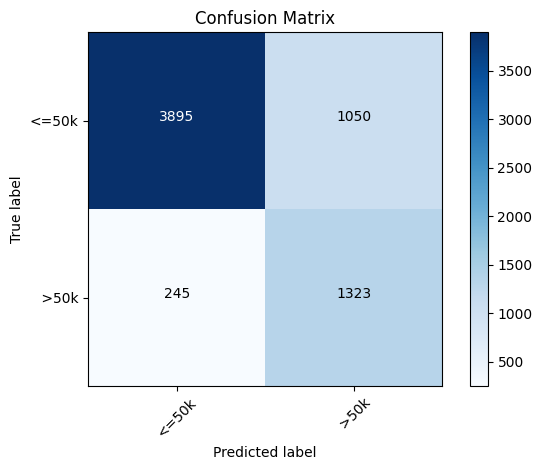


Training started for DecisionTree


{'estimator__splitter': 'best',
 'estimator__min_samples_split': 5,
 'estimator__min_samples_leaf': 1,
 'estimator__max_depth': 40,
 'estimator__criterion': 'entropy'}

{'0': {'precision': 0.8902212114947281,
  'recall': 0.870778564206269,
  'f1-score': 0.8803925577591494,
  'support': 4945.0},
 '1': {'precision': 0.6187350835322196,
  'recall': 0.6613520408163265,
  'f1-score': 0.6393341553637485,
  'support': 1568.0},
 'accuracy': 0.8203592814371258,
 'macro avg': {'precision': 0.7544781475134739,
  'recall': 0.7660653025112978,
  'f1-score': 0.759863356561449,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8248611241854676,
  'recall': 0.8203592814371258,
  'f1-score': 0.8223579231889071,
  'support': 6513.0}}

AUC: 0.7660653025112978


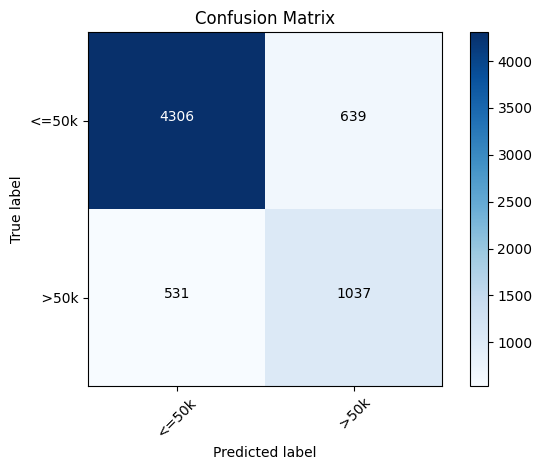


Training started for Random Forest


{'estimator__n_estimators': 200,
 'estimator__min_samples_split': 5,
 'estimator__min_samples_leaf': 1,
 'estimator__max_depth': 70,
 'estimator__criterion': 'gini',
 'estimator__bootstrap': True}

{'0': {'precision': 0.9145510835913313,
  'recall': 0.896056622851365,
  'f1-score': 0.9052093973442287,
  'support': 4945.0},
 '1': {'precision': 0.6918465227817746,
  'recall': 0.735969387755102,
  'f1-score': 0.7132262051915946,
  'support': 1568.0},
 'accuracy': 0.8575157377552587,
 'macro avg': {'precision': 0.8031988031865529,
  'recall': 0.8160130053032335,
  'f1-score': 0.8092178012679117,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8609351229972295,
  'recall': 0.8575157377552587,
  'f1-score': 0.858989583848861,
  'support': 6513.0}}

AUC: 0.8160130053032335


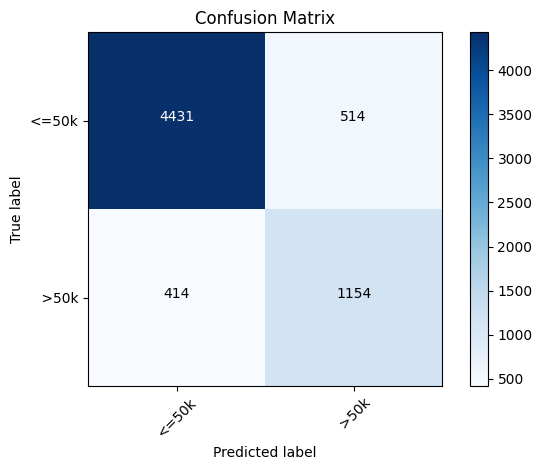

In [12]:
# evaluate all three best models

# create a list to save predictions
estimator_predictions = []
estimator_probabilities = []


for randomized_search_estimator, name in zip(estimator_list, names):
    print(f'\nTraining started for {name}')
    randomized_search_estimator.fit(data_train, target_train)
    predictions = randomized_search_estimator.predict(data_test)
    probabilities = randomized_search_estimator.predict_proba(data_test)[:, 1]
    estimator_predictions.append(predictions)
    estimator_probabilities.append(probabilities)
    display(randomized_search_estimator.best_params_)
    evaluate_classification(target_test, predictions)



Evaluation for KNN


AUC: 0.8157071536905965
Precision: 0.5575221238938053


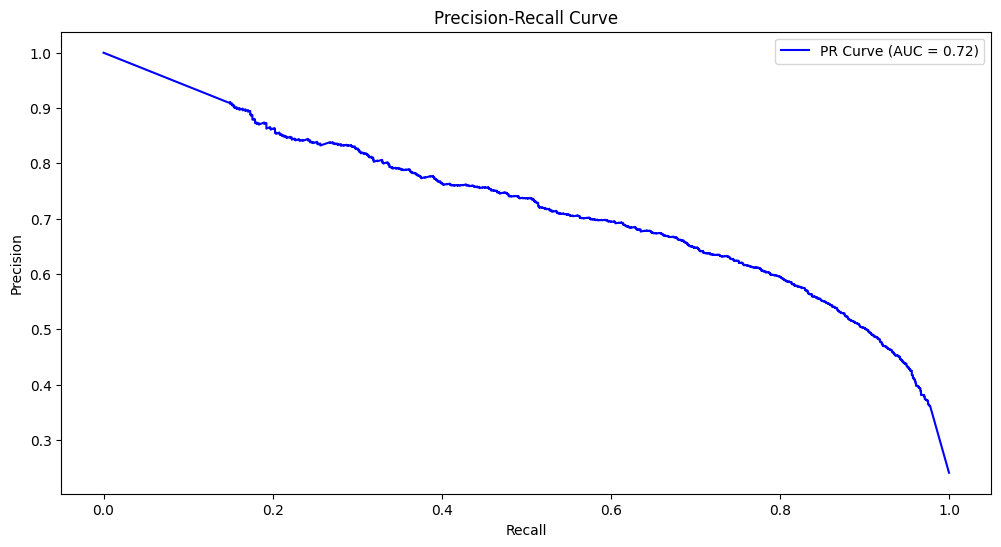


Evaluation for DecisionTree


AUC: 0.7660653025112978
Precision: 0.6187350835322196


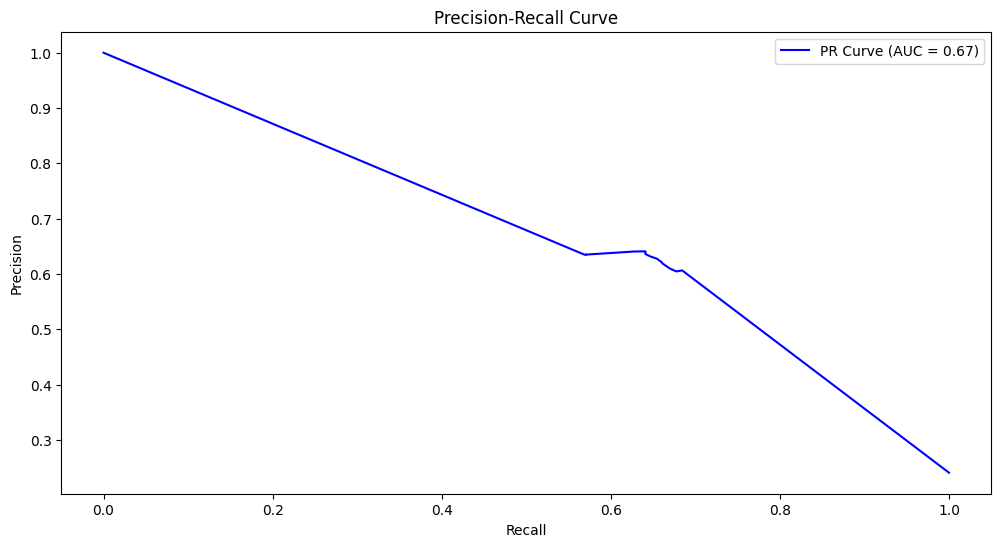


Evaluation for Random Forest


AUC: 0.8160130053032335
Precision: 0.6918465227817746


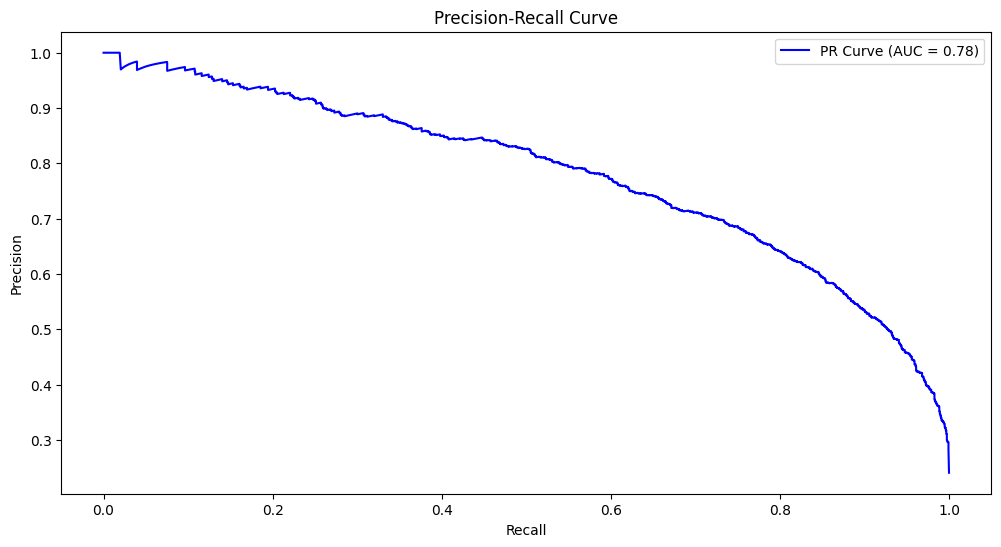

In [57]:
for name, predictions, probabilities in zip(names, estimator_predictions, estimator_probabilities):
    print(f'\nEvaluation for {name}')
    pr_evaluation(target_test, predictions, y_prob=probabilities)
    pr_evaluation_2(target_test, predictions, y_prob=probabilities)

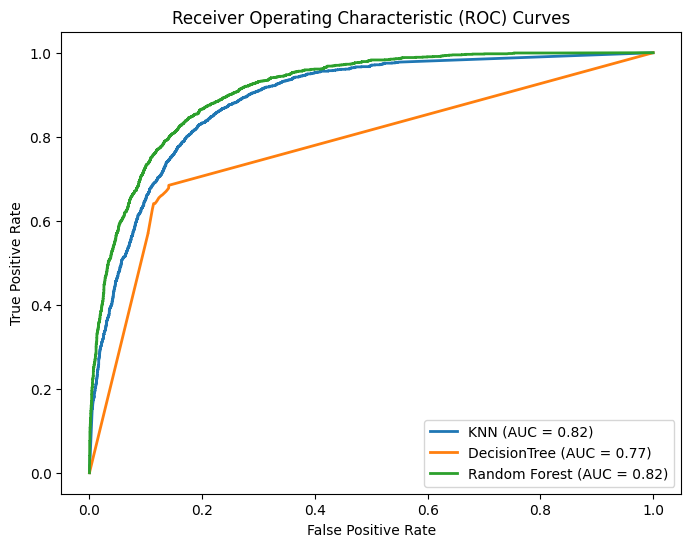

In [14]:
# we also want to compare them using the ROC-curves

# Define a function to plot the ROC curves
def plot_roc_curves(y_true, estimator_predictions, fitted_estimators, classifier_names):
    """
    Plot ROC curves for multiple classifiers on the same graph.

    Parameters:
    - y_true: array-like, true labels
    - estimators: list of fitted classifiers
    - classifier_names: list of strings, names of the classifiers

    Returns:
    - none, only plots the ROC curves
    """
    plt.figure(figsize=(8, 6))

    for estimator, classifier_name, predictions in zip(fitted_estimators, classifier_names,estimator_predictions):
        # Use predict_proba to get the predicted probabilities
        y_pred_proba = estimator.predict_proba(data_test)
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])  # Use probabilities for the positive class
        roc_auc = roc_auc_score(y_true, predictions)
        plt.plot(fpr, tpr, lw=2, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

# Plot the ROC curves
plot_roc_curves(target_test, estimator_predictions, estimator_list, names)

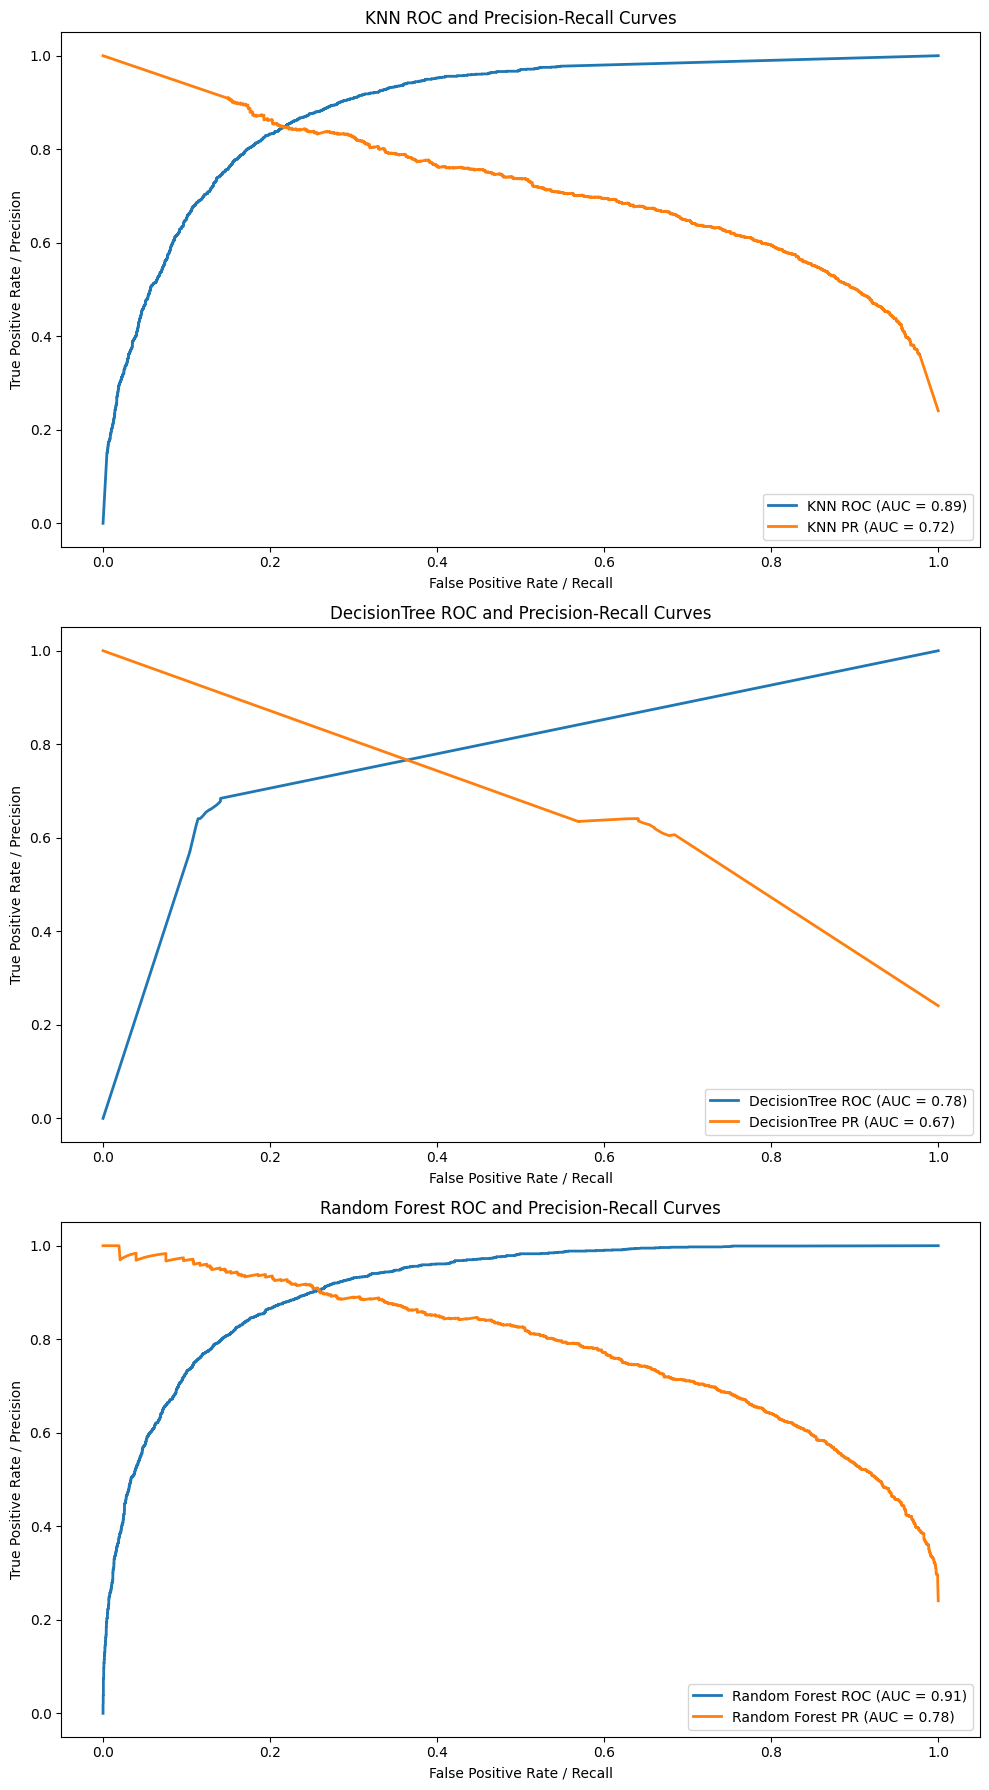

In [53]:
def plot_roc_pr_curves(y_true, estimator_predictions, fitted_estimators, classifier_names):
    num_classifiers = len(classifier_names)
    
    fig, axes = plt.subplots(nrows=num_classifiers, ncols=1, figsize=(10, 6 * num_classifiers))

    for i, (estimator, classifier_name, predictions) in enumerate(zip(fitted_estimators, classifier_names, estimator_predictions)):
        # Use predict_proba to get the predicted probabilities
        y_pred_proba = estimator.predict_proba(data_test)
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
        roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
        
        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_true, y_pred_proba[:, 1])
        pr_auc = auc(recall, precision)

        # Plot ROC Curve
        axes[i].plot(fpr, tpr, lw=2, label=f'{classifier_name} ROC (AUC = {roc_auc:.2f})')

        # Plot Precision-Recall Curve on the same plot
        axes[i].plot(recall, precision, lw=2, label=f'{classifier_name} PR (AUC = {pr_auc:.2f})')

        axes[i].set_xlabel('False Positive Rate / Recall')
        axes[i].set_ylabel('True Positive Rate / Precision')
        axes[i].set_title(f'{classifier_name} ROC and Precision-Recall Curves')
        axes[i].legend(loc='lower right')

    plt.tight_layout()
    plt.show()

plot_roc_pr_curves(target_test, estimator_predictions, estimator_list, names)


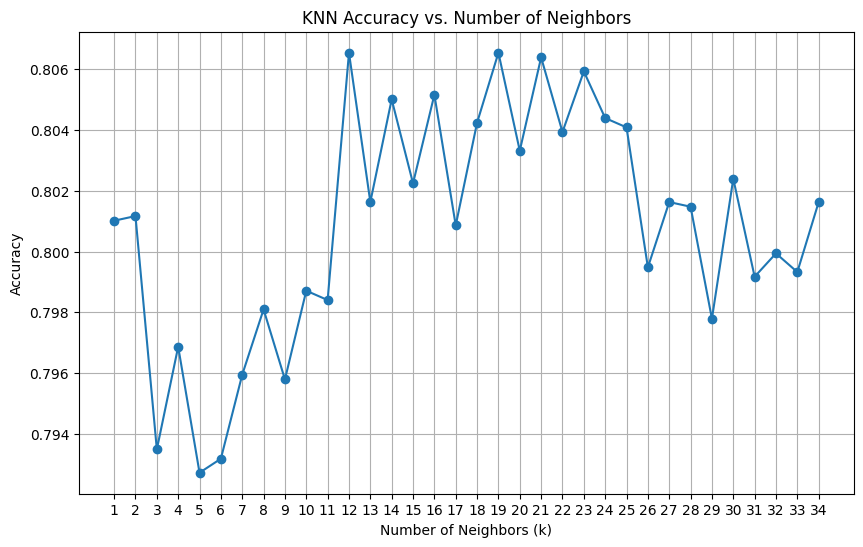

In [15]:
# best model is Random Forest. But with 100 trees and a depth of 50 not explainable.
#turn to an easy to explain model & take a closer look on how knn changes with different n-neighbors

# Lists to store values
k_values = []
accuracy_values = []

# as 21 was our previous max and chosen value, lets take a look what accuracy does before 21 and after
for n in range(1,35):

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', RandomOverSampler()),
        ('estimator', KNeighborsClassifier(n_neighbors = n, weights='distance', p= 1))
    ])   
    
    pipeline.fit(data_train, target_train)
    prediction = pipeline.predict(data_test)
    accuracy = accuracy_score(target_test, prediction)
    
    # Store values in lists
    k_values.append(n)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [40]:
# Access the best estimator
best_estimator = estimator_list[2].best_estimator_  # Assuming Random Forest is at index 2

# Check if the best estimator contains a RandomForestClassifier
if isinstance(best_estimator.named_steps['estimator'], RandomForestClassifier):
    # Extract feature importances
    feature_importances = best_estimator.named_steps['estimator'].feature_importances_

    # Print or visualize the feature importances
    print(feature_importances)


[1.42480953e-01 1.25681716e-01 7.52119618e-02 2.42051948e-02
 7.98687508e-02 1.13249600e-01 3.63100744e-03 4.56220678e-03
 2.20144041e-05 8.91195165e-03 5.25953482e-03 6.59268851e-03
 3.81345102e-03 1.41647716e-04 8.52459371e-03 3.90859925e-04
 1.06850133e-01 1.19520743e-03 3.86128109e-02 2.21054359e-03
 2.00940039e-03 5.43711131e-03 1.40818197e-05 5.88542462e-03
 1.61623854e-02 4.50361349e-03 4.27225232e-03 4.71627997e-03
 1.11740768e-02 2.99166805e-04 1.00899426e-02 2.89756226e-03
 5.71782779e-03 4.07172521e-03 4.30340684e-03 5.13875483e-02
 1.49685213e-02 2.57213258e-03 1.51109827e-02 7.61009912e-03
 1.25551027e-02 1.42517047e-03 2.48323028e-03 4.46863183e-03
 9.33309848e-04 5.58263403e-03 1.56594783e-02 1.19333469e-02
 2.65996732e-04 7.73694660e-04 4.33443259e-04 2.73326002e-04
 5.59718526e-04 3.34120257e-04 1.93290950e-04 2.65370625e-04
 7.08807549e-04 1.67643055e-04 8.79769371e-04 3.41864694e-04
 1.27819361e-04 1.89918466e-04 0.00000000e+00 1.52555398e-05
 1.58621453e-04 1.121921

In [44]:
# Check the type of the estimator
print(type(best_estimator.named_steps['estimator']))
# Check the type of the estimator
print(type(best_estimator.named_steps['estimator']))
print(df_data.columns)


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')


In [49]:
# Check the length of feature_importances and df_data.columns
print(len(feature_importances), len(df_data.columns))

# Sort feature importances
sorted_indices = feature_importances.argsort()[::-1]
sorted_columns = df_data.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': sorted_columns, 'Importance': sorted_importances})


89 13


IndexError: index 13 is out of bounds for axis 0 with size 13

In [41]:
import pandas as pd

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': df_data.columns, 'Importance': feature_importances})

# Print or visualize the feature importance DataFrame
print(feature_importance_df)


ValueError: All arrays must be of the same length